<a href="https://colab.research.google.com/github/tonqaow/229352-StatisticalLearning/blob/main/651610443_229351_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [ ]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

--2025-07-02 13:05:01--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-07-02 13:05:01--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2025-07-02 13:05:01 (24.5 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
# Reading csv file
housing = pd.read_csv("housing.csv")


In [ ]:
# Showing at the top rows
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Basic data exploration

In [ ]:
# Data's shape
print(housing.shape)


(20640, 10)


In [37]:
# Data's information
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [ ]:
# Drop rows with missing data
#print(housing.isnull().sum())
housing = housing.dropna()

In [38]:
# Data's information again
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Data's summary statistics
housing.describe()


          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [ ]:
# WRITE YOUR CODE HERE
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/Advertising.csv

--2025-07-02 13:04:11--  http://donlapark.pages.dev/229351/data/Advertising.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/Advertising.csv [following]
--2025-07-02 13:04:11--  https://donlapark.pages.dev/229351/data/Advertising.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3870 (3.8K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   3.78K  --.-KB/s    in 0s      

2025-07-02 13:04:11 (53.1 MB/s) - ‘Advertising.csv’ saved [3870/3870]



In [ ]:
#ข้อ2
Ads = pd.read_csv("Advertising.csv")

In [19]:
#ข้อ3
Ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
#ข้อ4
Ads.isnull().sum()

In [21]:
#ข้อ5
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Your answers here:

## Calling, indexing & modifying dataframes

In [ ]:
# Indexing a column
Ads[['TV', 'Radio',	'Newspaper',	'Sales']]


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
housing[["longitude", "latitude", "housing_median_age"]]

`ocean_proximity` is categorical. Let's count its values.

In [ ]:
# Count values in a column
housing["ocean_proximity"].value_counts()



,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
# Indexing rows by row id's
Ads.loc[0]


,0
TV,230.1
Radio,37.8
Newspaper,69.2
Sales,22.1


In [ ]:
# Indexing rows by row indices
Ads.iloc[0]


,0
TV,230.1
Radio,37.8
Newspaper,69.2
Sales,22.1


In [ ]:
# Indexing both rows and columns
Ads.loc[5, "Sales"]

np.float64(7.2)

## Basic statistics of a variable

In [ ]:
# Column's statistics
Ads["TV"].mean()



np.float64(147.0425)

## Selecting rows based on conditions

In [ ]:
# Indexing rows based on one condition
Ads[Ads["Sales"] > 15]


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
3,151.5,41.3,58.5,18.5
11,214.7,24.0,4.0,17.4
14,204.1,32.9,46.0,19.0
15,195.4,47.7,52.9,22.4
...,...,...,...,...
187,191.1,28.7,18.2,17.3
188,286.0,13.9,3.7,15.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3


In [ ]:
# Indexing rows based on one condition




## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [ ]:
# WRITE YOUR CODE HERE
#ข้อ1
housing.iloc[200:401]["total_bedrooms"].max()

2048.0

In [ ]:
#ข้อ2
housing[housing["total_bedrooms"] > 900].iloc[:, -3:]

## Plotting

In [ ]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [ ]:
housing.head(3)

In [ ]:
housing.plot.scatter(x="longitude", y="latitude");

In [ ]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.1)

In [ ]:
corr_matrix = housing.corr()

corr_matrix

### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [22]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [ ]:
df

In [50]:
groups = df.groupby('dataset')

In [ ]:
groups.get_group('I')

In [56]:
groups.max()

,x,y
dataset,,
I,14.0,10.84
II,14.0,9.26
III,14.0,12.74
IV,19.0,12.50


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จาก 2 ข้อข้างบน ให้บอกว่าทำไมการคำนวณค่าสถิติต่างๆ (mean, s.d., correlation) ยังไม่เพียงพอที่จะศึกษาข้อมูลชุดหนึ่ง

In [85]:
#median_sales = Ads["Sales"].median()
#Ads["sales_group"] = Ads["Sales"].apply(lambda x: "สูง" if x > median_sales else "ต่ำ")
group = Ads.groupby("sales_group")

In [99]:
group.mean()

,TV,Radio,Newspaper,Sales
sales_group,,,,
ต่ำ,94.078431,15.536275,27.885294,9.880392
สูง,202.168367,31.307143,33.331633,18.333673


In [95]:
group.std()

,TV,Radio,Newspaper,Sales
sales_group,,,,
ต่ำ,75.124622,13.580364,20.768776,2.351407
สูง,56.792840,11.490482,22.553321,3.642870


In [97]:
group[["TV", "Radio", "Newspaper", "Sales"]].corr()

TV     Radio  Newspaper     Sales
sales_group                                                   
ต่ำ         TV         1.000000 -0.567147  -0.063955  0.715971
            Radio     -0.567147  1.000000   0.339331 -0.152426
            Newspaper -0.063955  0.339331   1.000000  0.114540
            Sales      0.715971 -0.152426   0.114540  1.000000
สูง         TV         1.000000 -0.203109   0.013951  0.562391
            Radio     -0.203109  1.000000   0.351089  0.667691
            Newspaper  0.013951  0.351089   1.000000  0.288143
            Sales      0.562391  0.667691   0.288143  1.000000

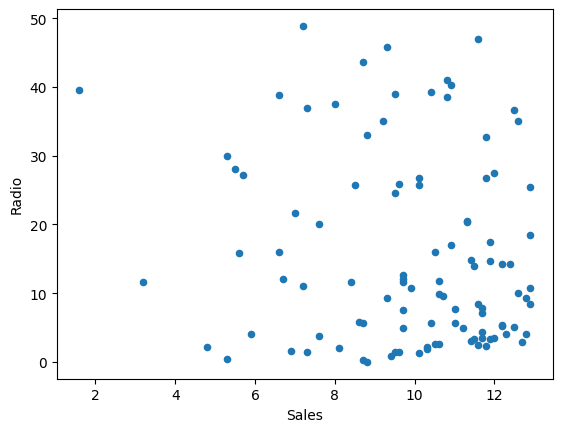

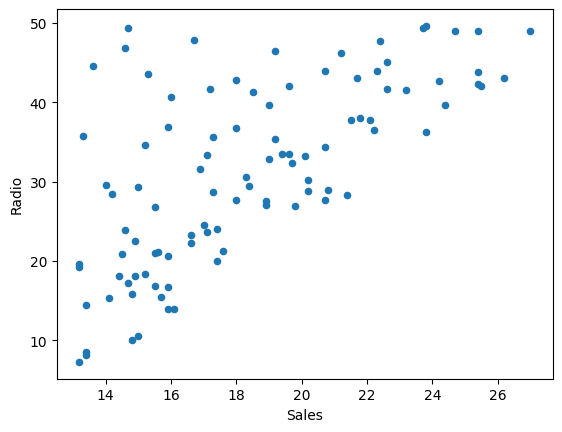

In [98]:
group.plot.scatter(x="Sales", y="Radio");

ข้อ3 ตอบ เพราะไม่สามารถแสดงความสัมพันธ์ที่ไม่เป็นเส้นตรง และค่าOutlier ต่างๆ การกระจายข้อมูลแตกต่างกันแม้ค่าเฉลี่ยเท่ากัน การแสดงข้อมูลด้วย scatter plotช่วยให้เห็นลักษณะการกระจายข้อมูลในแต่ละกลุ่มชัดเจนยิ่งขึ้น